<a href="https://colab.research.google.com/github/Ebratul/practices/blob/main/GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

In [2]:
data= datasets.load_diabetes()

In [3]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
import pandas as pd
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = pd.Series(data.target)

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [6]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [8]:
df[df.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


In [9]:
x = df.iloc[:,:-1]
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01,loss = 'squared_error',alpha=0.001)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, learning_rate=0.01, n_estimators=500)

In [19]:
gbr.score(x_test, y_test)

0.47284886053684827

In [12]:
y_pred = gbr.predict(x_test)
y_pred

array([160.42191825, 192.50994924, 162.60251188, 281.12922924,
       122.67268452, 116.03202966, 227.28017941, 217.1098567 ,
       153.16558012, 159.25300964, 100.76123989, 186.17219932,
        93.27516671, 237.84294244, 108.10237337, 108.01357166,
       227.16425135, 250.02086985, 203.49242788, 232.03232286,
       182.66681814,  98.88931311,  77.95471854, 201.687495  ,
       152.77030481, 197.93158857, 201.46856646, 179.40156252,
        74.79865481, 109.15885069, 186.56220087, 108.41686584,
       153.02239044, 189.87287485, 162.66470224, 208.37411657,
       123.90284298, 119.66042665, 181.26332944,  74.47570291,
        76.70998375,  92.45072888, 170.2295495 , 180.88652985,
       173.23300162,  83.27888403,  94.5786044 , 112.69481214,
        77.36472624, 166.15681189, 130.47647332,  83.27558798,
       138.72417202,  99.83738952, 212.86800719, 146.31118786,
        98.1073177 , 229.0273094 ,  90.66037249,  86.76054361,
       175.24053175, 178.48071627, 134.31467416,  90.86

In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

43.40838685144512

In [20]:
gbr.feature_importances_

array([0.03852234, 0.01031144, 0.41868839, 0.08750067, 0.03016353,
       0.04581921, 0.03779641, 0.02943657, 0.26126757, 0.04049387])

In [15]:
feature_score = pd.Series(gbr.feature_importances_, index = x_train.columns).sort_values(ascending=False)
feature_score

,0
bmi,0.418688
s5,0.261268
bp,0.087501
s2,0.045819
s6,0.040494
age,0.038522
s3,0.037796
s1,0.030164
s4,0.029437
sex,0.010311


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'bmi'),
  Text(1, 0, 's5'),
  Text(2, 0, 'bp'),
  Text(3, 0, 's2'),
  Text(4, 0, 's6'),
  Text(5, 0, 'age'),
  Text(6, 0, 's3'),
  Text(7, 0, 's1'),
  Text(8, 0, 's4'),
  Text(9, 0, 'sex')])

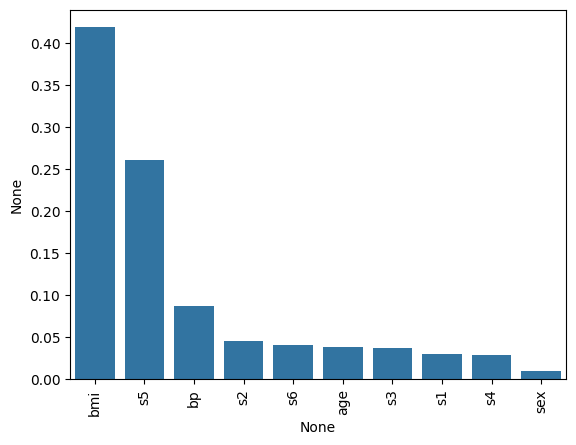

In [16]:
sb.barplot(x = feature_score.index, y = feature_score)
plt.xticks(rotation = 90)


In [17]:
from sklearn.metrics import mean_squared_error

In [29]:
# for y_pred in gbr.staged_predict(x_test):
#   print(y_pred)

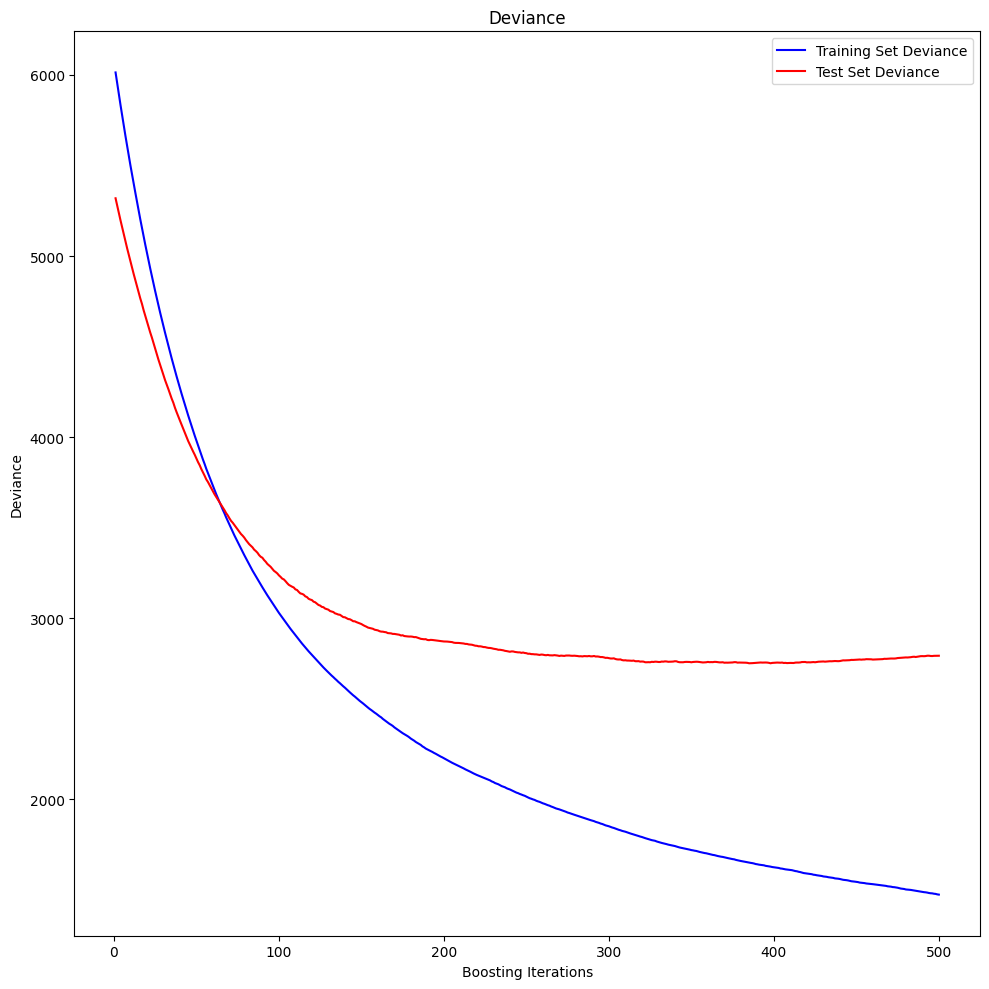

In [32]:
# Test score calculation
# test_score = np.zeros((500,), dtype=np.float64)
# for i, y_pred in enumerate(gbr.staged_predict(x_test)):
#     test_score[i] = mean_squared_error(y_test, y_pred)

test_score = []

# প্রতিটি ধাপে prediction নাও
for y_pred in gbr.staged_predict(x_test):
    # error হিসাব করো
    error = mean_squared_error(y_test, y_pred)
    # error লিস্টে যোগ করো
    test_score.append(error)

# train_score_manual ≈ gbr.train_score_
# প্রায় একই trend, একই decreasing behavior দেখাবে।

train_score_manual = []

for y_pred in gbr.staged_predict(x_train):
    error = mean_squared_error(y_train, y_pred)
    train_score_manual.append(error)

# Plotting Deviance
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(500) + 1, train_score_manual, 'b-', label='Training Set Deviance')
plt.plot(np.arange(500) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()


In [30]:
# test_score

In [31]:
gbr.train_score_

array([6013.88497995, 5952.61595627, 5892.56618616, 5833.69452081,
       5775.98973826, 5719.41236183, 5662.67349673, 5607.74156796,
       5553.89711576, 5501.09213373, 5449.33258322, 5398.8237817 ,
       5349.01700871, 5299.16207999, 5250.22647947, 5202.15197115,
       5154.95415815, 5108.61641898, 5063.16231828, 5018.4414    ,
       4974.61042396, 4931.62548657, 4889.21710316, 4847.76226156,
       4806.71355268, 4766.76261532, 4727.19588352, 4688.38443991,
       4650.46998816, 4613.28063138, 4576.44889765, 4540.55565934,
       4505.01333119, 4469.61527139, 4435.29250137, 4401.60656575,
       4367.57110868, 4335.21553466, 4303.20243107, 4270.90311404,
       4240.22689302, 4209.77946568, 4179.28975299, 4149.25800465,
       4120.36018334, 4092.01302815, 4063.16039369, 4035.09322785,
       4007.57468208, 3981.09867577, 3954.02624076, 3928.4196073 ,
       3900.78758707, 3875.45998042, 3851.15675532, 3824.85967364,
       3801.35907048, 3777.0094306 , 3753.52602385, 3730.49530